In [4]:
%pylab inline
import scipy
from scipy import misc
from scipy import ndimage
from skimage import feature
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from skimage.transform import hough_circle, hough_circle_peaks
from skimage import data, color, img_as_ubyte
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter
from skimage.draw import circle_perimeter
import cv2

Populating the interactive namespace from numpy and matplotlib


ImportError: dlopen(/Users/nvalencia/anaconda3/lib/python3.6/site-packages/cv2/cv2.cpython-36m-darwin.so, 2): Symbol not found: _clock_gettime
  Referenced from: /Users/nvalencia/anaconda3/lib/python3.6/site-packages/cv2/.dylibs/libavutil.55.78.100.dylib (which was built for Mac OS X 10.12)
  Expected in: /usr/lib/libSystem.B.dylib
 in /Users/nvalencia/anaconda3/lib/python3.6/site-packages/cv2/.dylibs/libavutil.55.78.100.dylib

[[[121 112 131]
  [138 129 148]
  [153 144 165]
  ..., 
  [119 126  74]
  [131 136  82]
  [139 144  90]]

 [[ 89  82 100]
  [110 103 121]
  [130 122 143]
  ..., 
  [118 125  71]
  [134 141  87]
  [146 153  99]]

 [[ 73  66  84]
  [ 94  87 105]
  [115 108 126]
  ..., 
  [117 126  71]
  [133 142  87]
  [144 153  98]]

 ..., 
 [[ 87 106  76]
  [ 94 110  81]
  [107 124  92]
  ..., 
  [120 158  97]
  [119 157  96]
  [119 158  95]]

 [[ 85 101  72]
  [ 95 111  82]
  [112 127  96]
  ..., 
  [121 157  96]
  [120 156  94]
  [120 156  94]]

 [[ 85 101  74]
  [ 97 113  84]
  [111 126  97]
  ..., 
  [120 156  95]
  [119 155  93]
  [118 154  92]]]
(768, 1024, 3) uint8


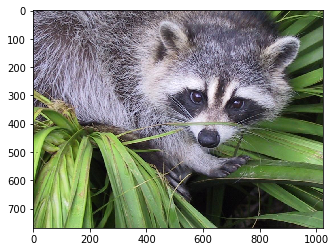

In [2]:
face=misc.face()
print(face)
print(face.shape,face.dtype)
imshow(face)

In [3]:
misc.imsave('face.png', face)

In [4]:
face

array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        ..., 
        [119, 126,  74],
        [131, 136,  82],
        [139, 144,  90]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143],
        ..., 
        [118, 125,  71],
        [134, 141,  87],
        [146, 153,  99]],

       [[ 73,  66,  84],
        [ 94,  87, 105],
        [115, 108, 126],
        ..., 
        [117, 126,  71],
        [133, 142,  87],
        [144, 153,  98]],

       ..., 
       [[ 87, 106,  76],
        [ 94, 110,  81],
        [107, 124,  92],
        ..., 
        [120, 158,  97],
        [119, 157,  96],
        [119, 158,  95]],

       [[ 85, 101,  72],
        [ 95, 111,  82],
        [112, 127,  96],
        ..., 
        [121, 157,  96],
        [120, 156,  94],
        [120, 156,  94]],

       [[ 85, 101,  74],
        [ 97, 113,  84],
        [111, 126,  97],
        ..., 
        [120, 156,  95],
        [119, 155,  93],
        [118, 154,

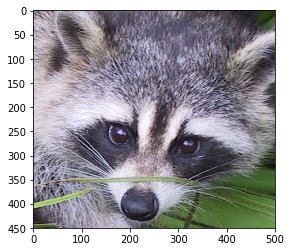

In [5]:
lx, ly = face.shape[0:2]
crop_face=face[50:500,400:900,:]
imshow(crop_face)

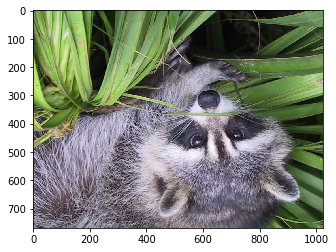

In [6]:
# invertir upside down
flip_ud_face = np.flipud(face)
imshow(flip_ud_face)

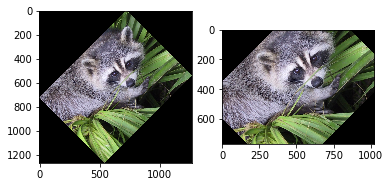

In [7]:
#rotar imagen
rotada=ndimage.rotate(face,45)
rotada2=ndimage.rotate(face,45,reshape=False)
subplot(121)
imshow(rotada)
subplot(122)
imshow(rotada2)

(-0.5, 1023.5, 767.5, -0.5)

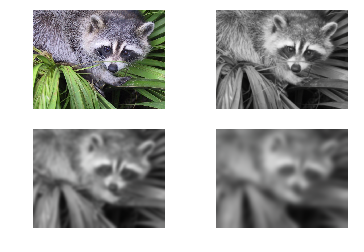

In [8]:
blurred_face = ndimage.gaussian_filter(face, sigma=3)
more_blurred_face=ndimage.gaussian_filter(face,sigma=11)
mega_blurred_face=ndimage.gaussian_filter(face,sigma=20)
subplot(221)
axis('off')
imshow(face)
subplot(222)
axis('off')
imshow(blurred_face)
subplot(223)
axis('off')
imshow(more_blurred_face)
subplot(224)
imshow(mega_blurred_face)
axis('off')

(-0.5, 1023.5, 767.5, -0.5)

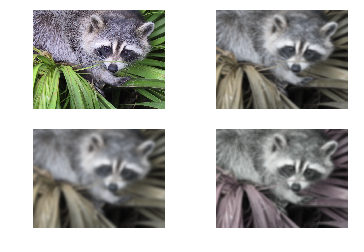

In [9]:
blurred_face = ndimage.gaussian_filter(face, sigma=(5, 6, 1))
very_blurred_face = ndimage.gaussian_filter(face, sigma=(10, 10, 1))
local_mean_face = ndimage.uniform_filter(face, size=(20, 20, 5))
plt.subplot(221)
plt.imshow(face)
plt.axis('off')
plt.subplot(222)
plt.imshow(blurred_face)
plt.axis('off')
plt.subplot(223)
plt.imshow(very_blurred_face)
plt.axis('off')
plt.subplot(224)
plt.imshow(local_mean_face)
plt.axis('off')

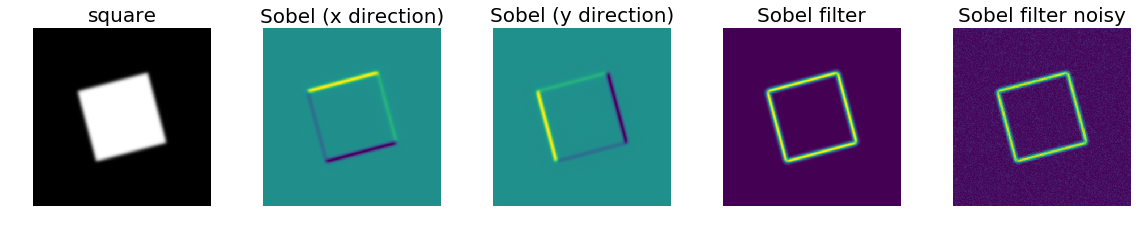

In [10]:
im = np.zeros((256, 256))
im[64:-64, 64:-64] = 2
im = ndimage.rotate(im, 15)
im = ndimage.gaussian_filter(im, 3)

sx = ndimage.sobel(im, axis=0)
sy = ndimage.sobel(im, axis=1)
sob = np.hypot(sx, sy)

figure(figsize=(16, 5))
subplot(151)
imshow(im, cmap=plt.cm.gray)
axis('off')
title('square', fontsize=20)
subplot(152)
imshow(sx)
axis('off')
title('Sobel (x direction)', fontsize=20)
subplot(153)
imshow(sy)
axis('off')
title('Sobel (y direction)', fontsize=20)
subplot(154)
imshow(sob)
axis('off')
title('Sobel filter', fontsize=20)

subplot(155)

im_noisy = im + 0.07*np.random.random(im.shape)
sx = ndimage.sobel(im_noisy, axis=0)
sy = ndimage.sobel(im_noisy, axis=1)
sob = np.hypot(sx, sy)
imshow(sob)
axis('off')
title('Sobel filter noisy', fontsize=20)

tight_layout()

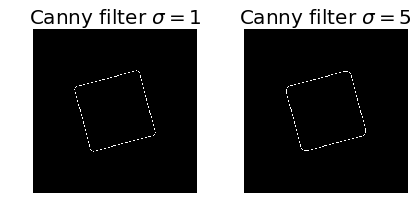

In [11]:
#filtro canny. Mayor el ruido, mayor debe ser sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=5)
figure
subplot(121)
imshow(edges1,cmap=plt.cm.gray)
axis('off')
title('Canny filter $\sigma=1$',fontsize=20)
subplot(122)
imshow(edges2,cmap=plt.cm.gray)
axis('off')
title('Canny filter $\sigma=5$',fontsize=20)
tight_layout()

In [12]:
h, theta, d = hough_line(edges1)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - im.shape[1] * np.cos(angle)) / np.sin(angle)

## ejemplo

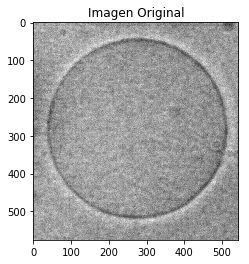

In [13]:
Im1 = pylab.imread("ves_full_150_002.jpg")
#print imagen
pylab.imshow(Im1, cmap = cm.Greys_r)
plt.title('Imagen Original', fontsize=12)
pylab.gray()

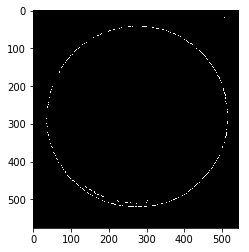

In [14]:
Im2=Im1[:,:,0]
edges=feature.canny(Im2,sigma=3.1)
imshow(edges)

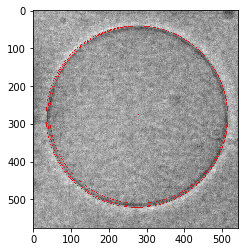

In [107]:
hough_radii = np.arange(100, 500, 2)
hough_res = hough_circle(edges, hough_radii)

accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=3)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
Im2 = color.gray2rgb(Im2)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    Im2[circy, circx] = (220, 20, 20)
    Im2[center_y,center_x]=(220,20,20)
ax.imshow(Im2, cmap=plt.cm.gray)
plt.show()

In [108]:
radii #tres mejores radios de la vesicula

array([238, 240, 234])

In [109]:
center_y #Tres mejores centroides y

276

In [110]:
cx #Tres mejores centroides x

array([276, 274, 278])

In [111]:
radio=mean(radii)
centroy=mean(cy)
centrox=mean(cx)
print('La vesicula tiene un radio de %.3f y un centroide con coordenadas de (%.0f,%.0f)' %(radio,centrox,centroy))

La vesicula tiene un radio de 237.333 y un centroide con coordenadas de (276,279)


## Evaluación de desempeño

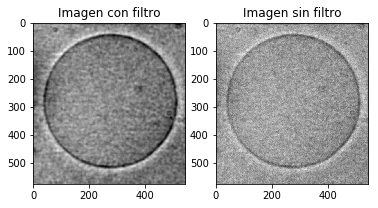

In [127]:
Im3=Im1[:,:,0]
filtro_ves = ndimage.uniform_filter(Im3, size=5) #Aplicación de filtro gaussiano para reducción de ruido
subplot(121)
imshow(filtro_ves)
title('Imagen con filtro')
subplot(122)
imshow(Im1)
title('Imagen sin filtro')
show()

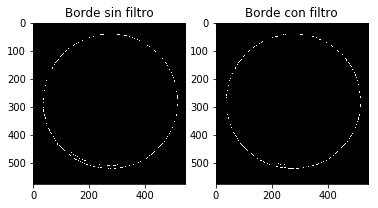

In [129]:
edges2=feature.canny(filtro_ves,sigma=3.1)
subplot(121)
imshow(edges)
title('Borde sin filtro')
subplot(122)
imshow(edges2)
title('Borde con filtro')
show()

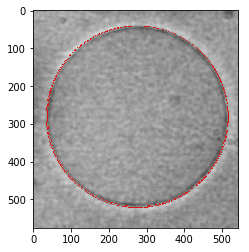

In [124]:
hough_radii2 = np.arange(100, 500, 2)
hough_res2 = hough_circle(edges2, hough_radii2)

accums2, cx2, cy2, radii2 = hough_circle_peaks(hough_res2, hough_radii2,
                                           total_num_peaks=3)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8, 4))
filtro_ves = color.gray2rgb(filtro_ves)
for center_y, center_x, radius in zip(cy2, cx2, radii2):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    filtro_ves[circy, circx] = (220, 20, 20)
    filtro_ves[center_y,center_x]=(220,20,20)
ax.imshow(filtro_ves, cmap=plt.cm.gray)

plt.show()

In [16]:
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=3)

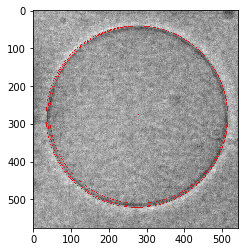

In [17]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
Im2 = color.gray2rgb(Im2)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    Im2[circy, circx] = (220, 20, 20)
    Im2[center_y,center_x]=(220,20,20)
ax.imshow(Im2, cmap=plt.cm.gray)
plt.show()

In [125]:
radio2=mean(radii2)
centroy2=mean(cy2)
centrox2=mean(cx2)
print('La vesicula tiene un radio de %.3f y un centroide con coordenadas de (%.0f,%.0f)' %(radio2,centrox2,centroy2))

La vesicula tiene un radio de 239.333 y un centroide con coordenadas de (275,281)


## Análisis granulometría

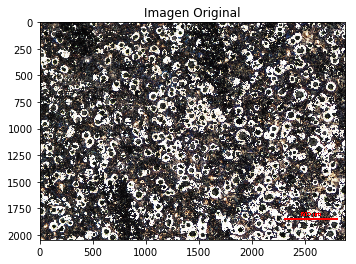

In [132]:
fenod = pylab.imread("FeNod_50X_L.tif")
#print imagen
pylab.imshow(fenod, cmap = cm.Greys_r)
plt.title('Imagen Original', fontsize=12)
show()

In [135]:
pip install opencv-python


The following command must be run outside of the IPython shell:

    $ pip install opencv-python

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/


In [ ]:
#keyminz